# ***Complete Guide to Generative AI for Data Analysis and Data Science***

---



### **Chapter 7:** *Making Inferences from Data*

a) Two-Sample T-Test

In [1]:
import numpy as np
from scipy import stats

# Data
email_leads = [15, 30, 27, 54, 95, 12, 45, 67, 87, 65, 56, 99, 44, 56, 55, 77, 34, 54, 84, 6, 44, 35, 6, 34, 81]
social_media_leads = [30, 67, 93, 104, 38, 60, 102, 42, 71, 39, 47, 65, 39, 29, 16, 123, 45, 59, 78, 84, 92, 95, 86, 89, 88]

# Calculate means and standard deviations
mean_email = np.mean(email_leads)
mean_social_media = np.mean(social_media_leads)
std_email = np.std(email_leads, ddof=1)
std_social_media = np.std(social_media_leads, ddof=1)

# Calculate the t-test
t_statistic, p_value = stats.ttest_ind(email_leads, social_media_leads)

# Print the results
print(f"Email Leads Mean: {mean_email}")
print(f"Social Media Leads Mean: {mean_social_media}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the leads generated by email and social media.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the leads generated by email and social media.")

Email Leads Mean: 50.48
Social Media Leads Mean: 67.24
T-Statistic: -2.14716566155275
P-Value: 0.03685979547948103
Reject the null hypothesis: There is a significant difference between the leads generated by email and social media.


In [2]:
#With minor variations
# Data
email_leads = [15, 30, 27, 54, 95, 12, 45, 67, 87, 65, 56, 99, 44, 56, 55, 77, 34, 54, 84, 6, 44, 35, 6, 34, 81]
social_media_leads = [15, 40, 27, 54, 95, 12, 45, 77, 87, 65, 56, 99, 44, 56, 55, 87, 34, 54, 84, 6, 44, 35, 6, 34, 91]

# Calculate means and standard deviations
mean_email = np.mean(email_leads)
mean_social_media = np.mean(social_media_leads)
std_email = np.std(email_leads, ddof=1)
std_social_media = np.std(social_media_leads, ddof=1)

# Calculate the t-test
t_statistic, p_value = stats.ttest_ind(email_leads, social_media_leads)

# Print the results
print(f"Email Leads Mean: {mean_email}")
print(f"Social Media Leads Mean: {mean_social_media}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the leads generated by email and social media.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the leads generated by email and social media.")

Email Leads Mean: 50.48
Social Media Leads Mean: 52.08
T-Statistic: -0.20496521410999405
P-Value: 0.8384660114359966
Fail to reject the null hypothesis: There is no significant difference between the leads generated by email and social media.


b) ANOVA Testing

In [4]:
import pandas as pd

# Data preparation
data = {
    'responseID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031],
    'region': ['East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West', 'East', 'Central', 'West'],
    'date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03', '2024-05-04', '2024-05-04', '2024-05-04', '2024-05-05', '2024-05-05', '2024-05-05', '2024-05-06', '2024-05-06', '2024-05-06', '2024-05-07', '2024-05-07', '2024-05-07', '2024-05-08', '2024-05-08', '2024-05-08', '2024-05-09', '2024-05-09', '2024-05-09', '2024-05-10', '2024-05-10', '2024-05-10'],
    'leads': [12, 8, 6, 15, 11, 9, 10, 7, 13, 18, 14, 5, 15, 12, 8, 6, 15, 11, 9, 10, 7, 13, 18, 14, 5, 24, 28, 19, 28, 31]
}

df = pd.DataFrame(data)

# Group the data by region
east = df[df['region'] == 'East']['leads']
central = df[df['region'] == 'Central']['leads']
west = df[df['region'] == 'West']['leads']

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(east, central, west)

# Display the results
print(f'F-value: {f_value}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("There is a significant difference in the means of leads generated in each region.")
else:
    print("There is no significant difference in the means of leads generated in each region.")

# A low F-value (close to 1 or less) means the group means are very similar relative to the variation within the groups.
# 0.31 is quite low, suggesting that the variation between group means is much smaller than the variation within the groups.
# This implies no significant difference among the group means.
# The group means are pretty similar, and most of the variability is just random noise inside each group.

F-value: 0.31265998683536894
P-value: 0.7341115157656742
There is no significant difference in the means of leads generated in each region.


c) Chi-Square Test

In [5]:
import pandas as pd
import scipy.stats as stats

# Create the data
data = {
    'respondent_id': list(range(1, 31)),
    'region': ['East', 'West'] * 15,
    'education_level': [2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['region'], df['education_level'])

print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\n There is a statistically significant association between region and education level.")
else:
    print("\n No statistically significant association between region and education level.")

Contingency Table:
education_level  1  2  3
region                  
East             5  5  5
West             5  5  5

Chi-Square Test Results:
Chi2 Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 2
Expected Frequencies:
[[5. 5. 5.]
 [5. 5. 5.]]

 No statistically significant association between region and education level.


d) Testing Normality


Shapiro-Wilk Test for: disposable_income
Statistic = 0.8780, p-value = 0.0001
→ Data is likely **not normally distributed** (reject H0)


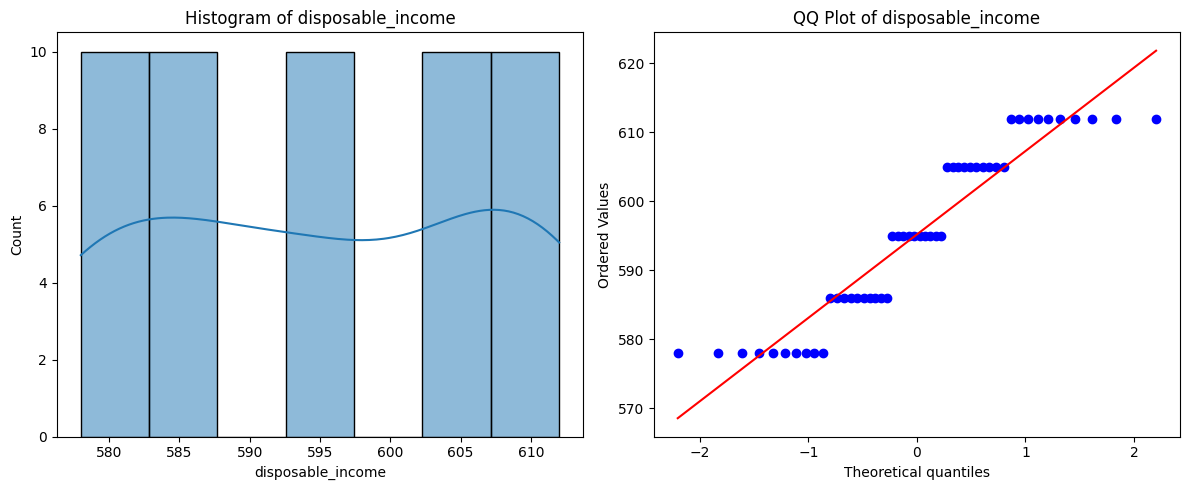


Shapiro-Wilk Test for: num_restaurants_visits
Statistic = 0.7846, p-value = 0.0000
→ Data is likely **not normally distributed** (reject H0)


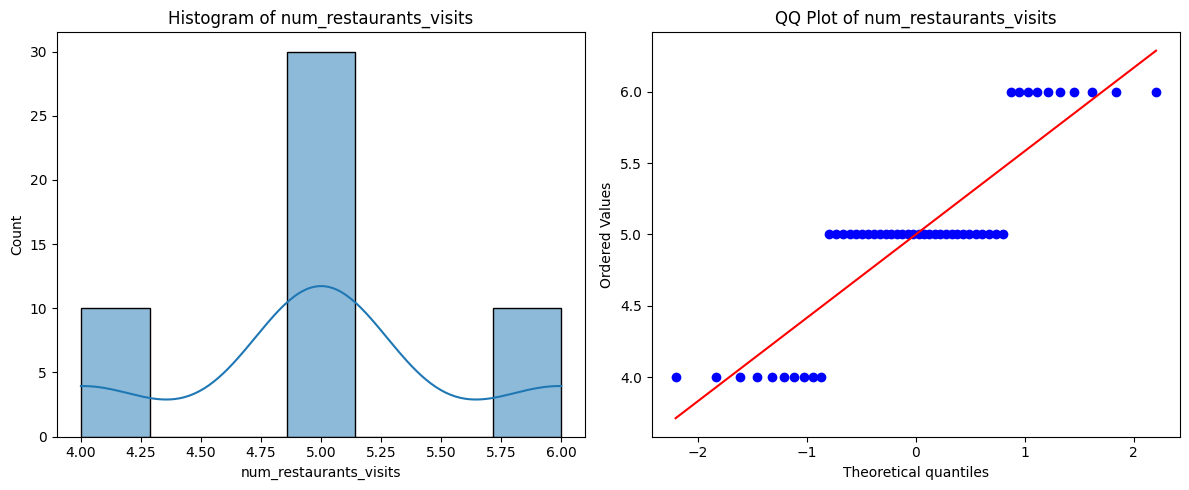

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Data
data = {
    'disposable_income': [
        605, 595, 578, 586, 612, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605
    ],
    'num_restaurants_visits': [
        5, 5, 4, 5, 6, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5
    ]
}

df = pd.DataFrame(data)

# Function to perform Shapiro-Wilk Test + Visuals
def check_normality(column):
    print(f"\nShapiro-Wilk Test for: {column}")
    stat, p = shapiro(df[column])
    print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p < 0.05:
        print("→ Data is likely **not normally distributed** (reject H0)")
    else:
        print("→ Data is likely **normally distributed** (fail to reject H0)")

    # Visualizations
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1, 2, 2)
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {column}")

    plt.tight_layout()
    plt.show()

# Test both columns
check_normality('disposable_income')
check_normality('num_restaurants_visits')

e) Testing for Correlation Analysis (when the variables are not normally distributed)

In [7]:
from scipy.stats import spearmanr

# Data
data = {
    'disposable_income': [
        605, 595, 578, 586, 612, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605,
        595, 578, 586, 612, 605, 595, 578, 586, 612, 605
    ],
    'num_restaurants_visits': [
        5, 5, 4, 5, 6, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5,
        5, 4, 5, 6, 5, 5, 4, 5, 6, 5
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Spearman Rank Correlation
corr, p_value = spearmanr(df['disposable_income'], df['num_restaurants_visits'])

# Output
print("Spearman's Rank Correlation Test")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("→ Statistically significant correlation (reject H0)")
else:
    print("→ No statistically significant correlation (fail to reject H0)")

Spearman's Rank Correlation Test
Correlation Coefficient: 0.8944
P-value: 0.0000
→ Statistically significant correlation (reject H0)


**Challenge:** Correlation Analysis<br>
Use the grocery sales dataset, calculate Pearson correlation coefficient for the two variables: sales price per unit and total sales price. Print the result.

In [9]:
import pandas as pd
from scipy.stats import shapiro, pearsonr

# === Configuration ===
file_name = "/content/07_challenge_grocery_sales_data_set.csv"  # Replace with actual CSV filename
price_col = "Sale Price per Unit"
total_revenue_col = "Total Revenue of Units Sold"
units_sold_col = "Units Sold"

# === Load Data ===
df = pd.read_csv(file_name)

# === Calculate 'total revenue per unit' ===
df["total revenue per unit"] = df[total_revenue_col] / df[units_sold_col]

# === Drop rows with missing or zero values in required columns ===
df = df[[price_col, "total revenue per unit"]].dropna()
df = df[df["total revenue per unit"] != float("inf")]

# === Shapiro-Wilk Normality Test ===
shapiro_price = shapiro(df[price_col])
shapiro_revunit = shapiro(df["total revenue per unit"])

print("Shapiro-Wilk Normality Test Results:")
print(f"- {price_col}:     W = {shapiro_price.statistic:.4f}, p = {shapiro_price.pvalue:.4f}")
print(f"- total revenue per unit: W = {shapiro_revunit.statistic:.4f}, p = {shapiro_revunit.pvalue:.4f}")

# === Interpret Normality ===
normal_price = shapiro_price.pvalue > 0.05
normal_revunit = shapiro_revunit.pvalue > 0.05

if normal_price and normal_revunit:
    # === Pearson Correlation ===
    corr, p_value = pearsonr(df[price_col], df["total revenue per unit"])
    print("\nPearson Correlation Test:")
    print(f"Correlation Coefficient: {corr:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("→ Statistically significant correlation (reject H0)")
    else:
        print("→ No statistically significant correlation (fail to reject H0)")
else:
    print("\n→ One or both variables are not normally distributed — consider using Spearman's rank correlation.")

#The result is 1 as the total revenue per units variable is a function of the sales price per unit variable

Shapiro-Wilk Normality Test Results:
- Sale Price per Unit:     W = 0.9986, p = 0.4710
- total revenue per unit: W = 0.9986, p = 0.4710

Pearson Correlation Test:
Correlation Coefficient: 1.0000
P-value: 0.0000
→ Statistically significant correlation (reject H0)
